In [366]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.optimize import curve_fit
from scipy.stats import bernoulli, binom, norm

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Q3

### (a)

In [367]:
p = 0.3
n = 20
N = 100
S = np.zeros((N, n), dtype="int")
x = []
for i in range(N):
    x = [1 if random.random() < p else -1 for i in range(n-1)]
    new_x = [0] + x
    S[i] = np.cumsum(new_x)

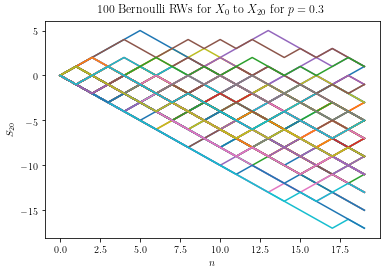

In [368]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$S_{20}$')
ax.set_xlabel(r'$n$')
ax.set_title(r'100 Bernoulli RWs for $X_{0}$ to $X_{20}$ for $p=0.3$')
for i in range(N):
    ax.plot(S[i])
plt.show()

### (b)

In [386]:
p = 0.35
n = 5
N = 100000
S = np.zeros((N, n), dtype="int")
for i in range(N):
    x = [1 if random.random() < p else -1 for i in range(n-1)]
    new_x = [0] + x
    S[i] = np.cumsum(new_x)
    
est_sample = S[:,-1].flatten()
est_weights = np.ones_like(est_sample) / len(est_sample)
x = np.arange(-n+1, n)
ideal = list(filter(None, binom.pmf(x, n, p)))

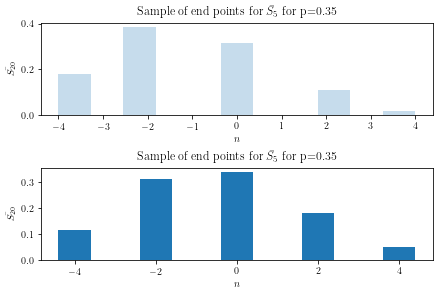

In [387]:
fig, (ax0, ax1) = plt.subplots(2, 1,  constrained_layout=True)
ax0.set_ylabel(r'$\bar{S_{20}}$')
ax0.set_xlabel(r'$n$')
ax0.set_title(r'Sample of end points for $\bar{S_{5}}$ for p=%.2f'%(p))
ax1.set_ylabel(r'$\bar{S_{20}}$')
ax1.set_xlabel(r'$n$')
ax1.set_title(r'Sample of end points for $\bar{S_{5}}$ for p=%.2f'%(p))

ax0.hist(est_sample, bins=2*n + 1, weights=est_weights, histtype='stepfilled', alpha=0.25)
ax1.bar(np.arange(-len(ideal)+1, len(ideal), 2), ideal)
plt.show()

### (c)

The resemblence of the two plots is quite clear. As we change $p$, the expectation value(mean) changes accordingly i.e shifts to the left when $p$ decreases and shifts to the right when $p$ increases. This means that for $p > 0.5$, the end points of the paths get biased towards the positive values and for $p < 0.5$ the reverse happens. Obviously for $p = 0.5$ one expects expects no biased behaviour, most walks will end up where they started .

### Q4

### (a)

In [371]:
times = (0.1, 0.01, 0.005)
t = 1
N = 50
S = [] 
for dt in times:
    n = int(t/dt)
    cur_S = np.zeros((N, n), dtype="float64")
    for i in range(N):
        w = norm.rvs(loc=0, scale=dt, size=n)
        w[0] = 0
        cur_S[i] = np.cumsum(w)
    S.append(cur_S)

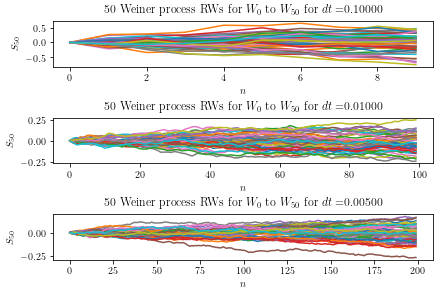

In [372]:
fig, axes = plt.subplots(3, 1,  constrained_layout=True)

for i in range(len(axes)):
    ax = axes[i]
    ax.set_ylabel(r'$S_{50}$')
    ax.set_xlabel(r'$n$')
    ax.set_title(r'50 Weiner process RWs for $W_{0}$ to $W_{50}$ for $dt=$%.5f'%(times[i]))
    for j in range(N):
        ax.plot(S[i][j])
plt.show()

### Analysis: 
The simple paths do not seem to be differentiable at all As $dt \to 0$, which is suppose to represent the limit towards continuos case, the frantic randomness of Brownian motion becomes very clear. The path has cusps at almost every infinitismal time step $dt$, producing discontinuities in the first derivative.

### (b)

In [373]:
dt = 0.01
t = 4
N = 100000
n = int(t / dt)
S = np.zeros((N, n), dtype="float")
for i in range(N):
    w = norm.rvs(loc=0, scale=dt, size=n)
    w[0] = 0
    S[i] = np.cumsum(w)

stdev = np.zeros(n)
for i in range(n):
    stdev[i] = np.std(S[:, i])

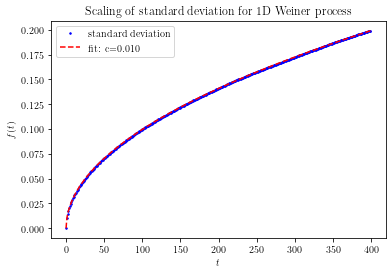

In [374]:
def f(x, c):
    return c * np.sqrt(x)

fig, ax = plt.subplots()
x = np.arange(len(stdev))
popt, _ = curve_fit(f, x, stdev)
ax.plot(x, stdev, 'bo', label="standard deviation", ms=1.5)
ax.plot(x, f(x, *popt), 'r--', label='fit: c=%5.3f' % tuple(popt))
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$f(t)$')
ax.set_title(r'Scaling of standard deviation for 1D Weiner process')
ax.legend()
plt.show()

#### Analysis:
Through the curve fitting, one obtains the fitting parameter as $c = dt=0.01$ and this fit does very well, as the data points and fit are indistinguishable. Which strongly suggests that the standard deviation of $W_t$ scales like $\sqrt{t}$

### (c)

In [379]:
dt = 0.001
t = 4
N = 100000
n = int(t / dt)
S = np.zeros((N, n), dtype="float")
for i in range(N):
    w = norm.rvs(loc=0, scale=dt, size=n)
    w[0] = 0
    S[i] = np.cumsum(w)

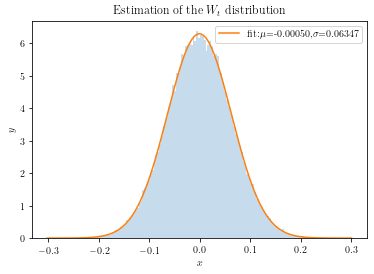

In [380]:
fig, ax = plt.subplots()
last = S[:, -1] 
mu, sigma = np.mean(last), np.std(last)
x = np.linspace(norm.ppf(0.000001, loc=mu, scale=sigma), norm.ppf(0.999999, loc=mu, scale=sigma), 1000)
ax.hist(last, bins="auto", density=True, histtype="stepfilled", alpha=0.25)
ax.plot(x,  norm.pdf(x, loc=mu, scale=sigma), label=r"fit:$\mu$=%2.5f,$\sigma$=%2.5f"%(mu, sigma))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'Estimation of the $W_t$ distribution')
ax.legend()
plt.show()

### Analysis:
The distribution $W_t$ is closely modelled by the Gaussian probability kernel, one can then envelope the histogram with the corresponding Gaussian. The parameters of the Gaussian can be estimated from the endpoint sample, taking it's mean and standard deviation. 

### Q5

### (a)

In [375]:
dt = 0.01
T = 2
lam = 1
n = int(T / dt)
x = np.zeros(n)
for i in range(n-1):
    u = random.random()
    if u > lam * dt:
        x[i + 1] = x[i] + math.sqrt(dt) * np.random.randn()

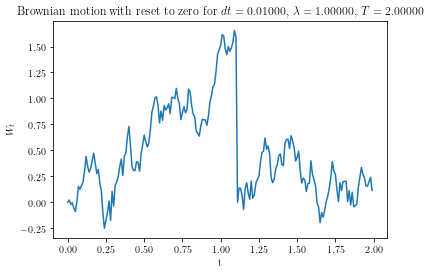

In [377]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$W_{t}$')
ax.set_xlabel(r't')
ax.set_title(r'Brownian motion with reset to zero for $dt=%.5f$, $\lambda=%.5f$, $T=%.5f$'%(dt, lam, T))
ax.plot(dt* np.arange(n), x)
plt.show()

### (b)

In [353]:
dt = 0.01
T = np.arange(2, 8)
lam = 2
L = int(1e5)
sample = np.zeros((len(T), L), dtype="float")

for i in range(len(T)):
    n = int(T[i] / dt)
    for l in range(L):
        resets = 0   
        for j in range(n-1):
            u = random.random()
            if u <= lam * dt:
                resets += 1
        sample[i][l] = resets

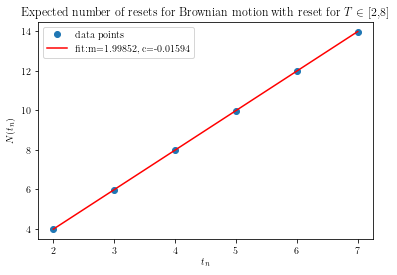

In [354]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$N(t_n)$')
ax.set_xlabel(r'$t_{n}$')
ax.set_title(r'Expected number of resets for Brownian motion with reset for $T$ $\in$ [2,8]')
means = [np.mean(sample[i]) for i in range(len(T))]
m, c = np.polyfit(T, means, 1)
ax.plot(T, means, 'o', label=r"data points")
ax.plot(T, T*m + c, '-r', label=r"fit:m=%2.5f, c=%2.5f"%(m, c))
ax.legend()
plt.show()

### Analysis:
The expected number of resets scales linearly with increasing $T$, fitting the data points to a linear function one obtains the scaling factor as $m \approx \lambda$ with $c \approx 0$. This behaviour is expected as number of counting up the number resets closely resembles a Poisson process with transition probability $\lambda$, thus $E[N_\text{resets}(t)] = \lambda t$

### (c)

In [382]:
dt = 0.01
T = 500000 ## send T to roughly ∞
lam = 1
n = int(T / dt)
y = np.zeros(n, dtype="float")
for i in range(n-1):
    u = random.random()
    if u > lam * dt:
        y[i + 1] = y[i] + math.sqrt(dt) * np.random.randn()

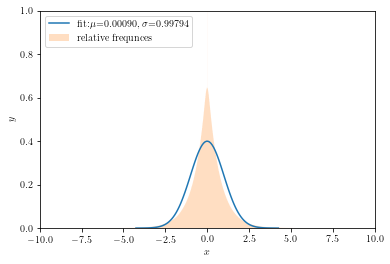

In [383]:
fig, ax = plt.subplots()
mu, sigma = np.mean(y), np.std(y)
x = np.linspace(norm.ppf(0.00001, loc=mu, scale=sigma), norm.ppf(0.99999, loc=mu, scale=sigma), 100)
weights= np.ones_like(y) / len(y)
ax.plot(x,  norm.pdf(x, loc=mu, scale=sigma), label=r"fit:$\mu$=%2.5f, $\sigma$=%2.5f"%(mu, sigma))
ax.hist(y, density=True, bins="auto", histtype='stepfilled', alpha=0.25, label=r"relative frequnces")
ax.set_ylim([0,1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend(loc='upper left')
plt.show()

### Analysis:
One can fit the results to a Gaussian distribution, since the Brownian motion strongly favours / biased towards the point zero then one might act that we will observe a distribution that is highly peaked at zero. This is what we observed when we fit the results to Gaussian by the estimating the relavant parameters from the sample. The Gaussian distribution is so highly peak at zero that starts to have a resemblence to a Dirac delta distribution (or function).

 ### Q6

In [18]:
t = 1
dt = 0.001
N = 5
n = int(t/dt)
S = np.zeros((N, 2, n), dtype="float64")
for i in range(N):
    x, y = norm.rvs(loc=0, scale=dt, size=n), norm.rvs(loc=0, scale=dt, size=n)
    x[0] = 0
    y[0] = 0
    S[i][0, :] = np.cumsum(x) 
    S[i][1, :] = np.cumsum(y)

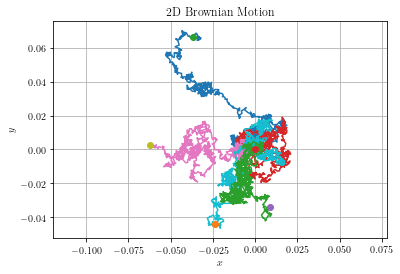

In [19]:
fig, ax  = plt.subplots()
for i in range(N):
    ax.plot(S[i][0], S[i][1])
    ax.plot(S[i][0, 0], S[i][1, 0], 'o')
    ax.plot(S[i][0, -1], S[i][1, -1], 'o')
ax.set_title('2D Brownian Motion')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.axis('equal')
ax.grid(True)
plt.show()

### Analysis:
Since the x and y coordinates of 2D Brownian motion are just two indepedent Brownian motion random varibles, we observe the same characteristic behaviour of Brownian motion in two dimensionals.